# Анализ результатов А/В-тестирования гипотез для интернет-магазина

Данная работа состоит из двух частей: 
- В первой части данном исследовании проводится приоритизация из изначально предложенных отделом маркетинга гипотез методами ICE и RICE.
- Во второй части проводится анализ результатов А/В-тестирования (какая конкретно гипотеза тестировалась в рамках задания не указано). 

<b>Используемые данные:</b>
- Таблица с предложенными гипотезами и их оценками.
- Лог транзакций в магазине за месяц среди пользователей, включенных в группы.
- Сводная таблица с количеством посещений за месяц среди пользователей, включенных в группы.

В рамках работы использовались библиотеки `pandas`, `matplotlib`, `numpy`, `seaborn`, `scipy`. Проводилась подготовка и компоновка данных, формирование описательных статистик, визуализаций, а также тестирование статистических гипотез с помощью критерия Манна-Уитни.


<b>Ключевые выводы:</b>
- Добавление критерия "Охват" изменило изначальную приоритизацию гипотез, ТОП-3 составили: увеличение числа форм, в которых пользователи могут подписаться на рассылку, добавление новых каналов привлечения, изменение структуры категорий на сайте. 
- Тест признан завершенным.
- Зафиксировано значимое преимущество группы В в уровне конверсии пользователей при отсутствии разницы в среднем чеке.

<a id="title"></a>

<b>Оглавление:</b>
1. [Открытие и первичный анализ данных](#start)
1. [I. Приоретизация гипотез](#hypothesis)
1. [II. Обработка результатов A/B тестирования](#A/B)
2. [Предобработка данных](#A/B)
    * [Замена типов данных](#types)
    * [Обработка ошибок](#mistakes)
    * [Промежуточный вывод](#first_conclusion)
3. [Анализ данных](#second_step)
    * [Динамика кумулятивных значений по группам](#second_step)
    * [Промежуточный вывод](#second_conclusion)
4. [Поиск выбросов](#third_step)
    * [Промежуточный вывод](#regions)
5. [A/B-тестирование](#test)
5. [Итоговый вывод](#final_step)

<a id="start"></a>

## Открытие и первичный анализ данных 

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as st
import datetime as dt

In [2]:
sns.set(rc={'figure.figsize':(12,9)})

In [3]:
pd.set_option('display.precision', 3)
pd.options.display.max_colwidth = 1

Подгружаем библиотеки

In [4]:
hypothesis = pd.read_csv('https://code.s3.yandex.net/datasets/hypothesis.csv')
orders = pd.read_csv('https://code.s3.yandex.net/datasets/orders.csv')
visitors = pd.read_csv('https://code.s3.yandex.net/datasets/visitors.csv')

Подгружаем массивы

In [5]:
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [6]:
orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


In [7]:
visitors

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


[Вернуться к оглавлению](#title)

<a id="hypothesis"></a>

## I. Приоритизация гипотез 

In [8]:
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


Итак, мы видим полный перечень гипотез, среди которых есть как касающиеся небольших изменений в дизайне ("поменять цвет страницы"), так и предполагающих создание целых структурных подразделений в компании ("запуск собственной службы доставки").

In [9]:
hypothesis['ICE'] = hypothesis['Impact']*hypothesis['Confidence']/hypothesis['Efforts']

In [10]:
hypothesis[['Hypothesis', 'ICE']].sort_values(by = 'ICE', ascending = False).style.background_gradient('coolwarm')

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


По результатам приоритизации методом ICE, мы видим, что наверху списка оказались предложения в основном маркетингового характера - реклама, акции. Меры же, предполагающие какую-то техническую работу, а-ля переструктуризация сайта, или вышеупомянутая служба доставки оказались ниже в списке.

In [11]:
hypothesis['RICE'] = hypothesis['Reach']*hypothesis['Impact']*hypothesis['Confidence']*hypothesis['Efforts']

In [12]:
hypothesis[['Hypothesis', 'RICE', 'ICE']].sort_values(by = 'RICE', ascending = False).style.background_gradient('coolwarm')

,Hypothesis,RICE,ICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",2800,11.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",1440,13.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",576,1.125000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",504,7.000000
8,"Запустить акцию, дающую скидку на товар в день рождения",405,16.200000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",400,2.000000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",360,8.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",36,1.333333
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1.000000


<b>Итоги приоритизации гипотез:</b><br>
- Добавление параметра "Охват" изменило картину с результатами приоритизации гипотез.
- Занимавшие позиции в топ-3 предложения по подписке и по добавлению новых каналов привлечения в топ-3 остались, однако, акции ко дню рождения резко съехали вниз именно из-за низкого охвата (у среднестатистического пользователя ДР раз в году:))
- При этом поднялись в рейтинге гипотезы, предполагающие переделку в сайте, ввиду того, что эти изменения точно увидят все пользователи.

<a id="A/B"></a>

## II. Обработка результатов A/B тестирования 

## Предобработка данных 

В данном разделе мы изменим типы данных и проведем поиск дубликатов, пропущенных значений и других возможных ошибок.

[Вернуться к оглавлению](#title)

<a id="types"></a>

### Замена типов данных 

In [13]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [14]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


В обоих таблицах необходимо поменять тип данных у даты.

In [15]:
orders['date'] = pd.to_datetime(orders['date'], format = '%Y-%m-%dT%H:%M:%S')

In [16]:
visitors['date'] = pd.to_datetime(visitors['date'], format = '%Y-%m-%dT%H:%M:%S')

Типы данных заменены для оптимальной работы с ними.

[Вернуться к оглавлению](#title)

<a id="mistakes"></a>

### Обработка ошибок

Для начала изучим на факт наличия пропущенных значений

In [17]:
def miss_table(data):
    missings = pd.DataFrame(data.isna().mean()*100, columns = ['% miss'])
    missings['# miss'] = pd.DataFrame(data.isna().sum())
    display (missings.style.background_gradient('coolwarm'))

In [18]:
miss_table(visitors)

,% miss,# miss
date,0.000000,0
group,0.000000,0
visitors,0.000000,0


In [19]:
miss_table(orders)

,% miss,# miss
transactionId,0.000000,0
visitorId,0.000000,0
date,0.000000,0
revenue,0.000000,0
group,0.000000,0


Пропуски в обеих таблицах отсутствуют

In [20]:
visitors.duplicated().sum()

0

In [21]:
orders.duplicated().sum()

0

Также проверим возможное наличие пользователей, оказавшихся сразу в двух группах.

In [22]:
double_users = orders[['visitorId', 'group']].groupby(by = 'visitorId', as_index = False).nunique().sort_values(by = 'group', ascending = False)

double_users = double_users[double_users['group']>1]

print ('Всего пользователей, оказавшихся сразу в обеих группах:', double_users.shape[1])

Всего пользователей, оказавшихся сразу в обеих группах: 2


Итак, мы нашли 58 пользователей, который оказались сразу в обеих группах. Теперь их надо удалить из нашего массива.

In [23]:
orders['visitorId'].nunique()

1031

In [24]:
orders = orders[~orders.loc[:,'visitorId'].isin(double_users['visitorId'])]

In [25]:
orders['visitorId'].nunique()

973

Итак, мы удалили из нашего массива пользователей, которые оказались сразу в обеих группах.

Более очевидных дубликатов также не наблюдается. Неочевидные дубликаты можно не искать в силу того, что в первой таблице все строки - это результаты посещаемости сайта за конкретный день, а во второй - лог транзакций с уникальными айди.

In [26]:
def des_var(data):
    for i in list(data):
        if (data[i].dtypes!='object') and (data[i].nunique() > 20):
             display (data[i].describe())
        else: 
            display (data[i].value_counts())
        print ('------------------------------')
        print (' ')

In [27]:
des_var(orders)

count    1.016e+03
mean     2.155e+09
std      1.234e+09
min      1.062e+06
25%      1.143e+09
50%      2.144e+09
75%      3.257e+09
max      4.289e+09
Name: transactionId, dtype: float64

------------------------------
 


count    1.016e+03
mean     2.129e+09
std      1.222e+09
min      5.115e+06
25%      1.044e+09
50%      2.150e+09
75%      3.147e+09
max      4.284e+09
Name: visitorId, dtype: float64

------------------------------
 


C:\Users\CaIII\AppData\Local\Temp\ipykernel_17972\2963841314.py:4: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  display (data[i].describe())


count     1016               
unique    31                 
top       2019-08-05 00:00:00
freq      43                 
first     2019-08-01 00:00:00
last      2019-08-31 00:00:00
Name: date, dtype: object

------------------------------
 


count    1.016e+03
mean     8.301e+03
std      4.212e+04
min      5.000e+01
25%      1.190e+03
50%      2.955e+03
75%      8.134e+03
max      1.294e+06
Name: revenue, dtype: float64

------------------------------
 


B    548
A    468
Name: group, dtype: int64

------------------------------
 


In [28]:
des_var(visitors)

C:\Users\CaIII\AppData\Local\Temp\ipykernel_17972\2963841314.py:4: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  display (data[i].describe())


count     62                 
unique    31                 
top       2019-08-01 00:00:00
freq      2                  
first     2019-08-01 00:00:00
last      2019-08-31 00:00:00
Name: date, dtype: object

------------------------------
 


A    31
B    31
Name: group, dtype: int64

------------------------------
 


count    62.000 
mean     607.290
std      114.401
min      361.000
25%      534.000
50%      624.500
75%      710.500
max      770.000
Name: visitors, dtype: float64

------------------------------
 


<a id="title"></a>

### Промежуточный вывод

- Типы данных заменены
- Пропуски, дубликаты и другие ошибки не обнаружены
- Лишние даты отсутствуют, тест проходил ровно на протяжении месяца для обеих групп

[Вернуться к оглавлению](#title)

<a id="second_step"></a>

## Анализ данных

### Динамика кумулятивных значений по группам

In [29]:
datesGroups = orders[['date','group']].drop_duplicates()

In [30]:
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [31]:
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

Получаем аггрегированные кумулятивные данные по заказам и посетителям.

In [32]:
cumulativeData = ordersAggregated.merge(visitorsAggregated, on=['date', 'group'])

In [33]:
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

Визуализируем кумулятивные данные по выручке, абсолютному и относительному среднему чеку, абсолютной и относительной конверсии в обеих анализируемых группах.

Text(0.5, 0, 'Дата')

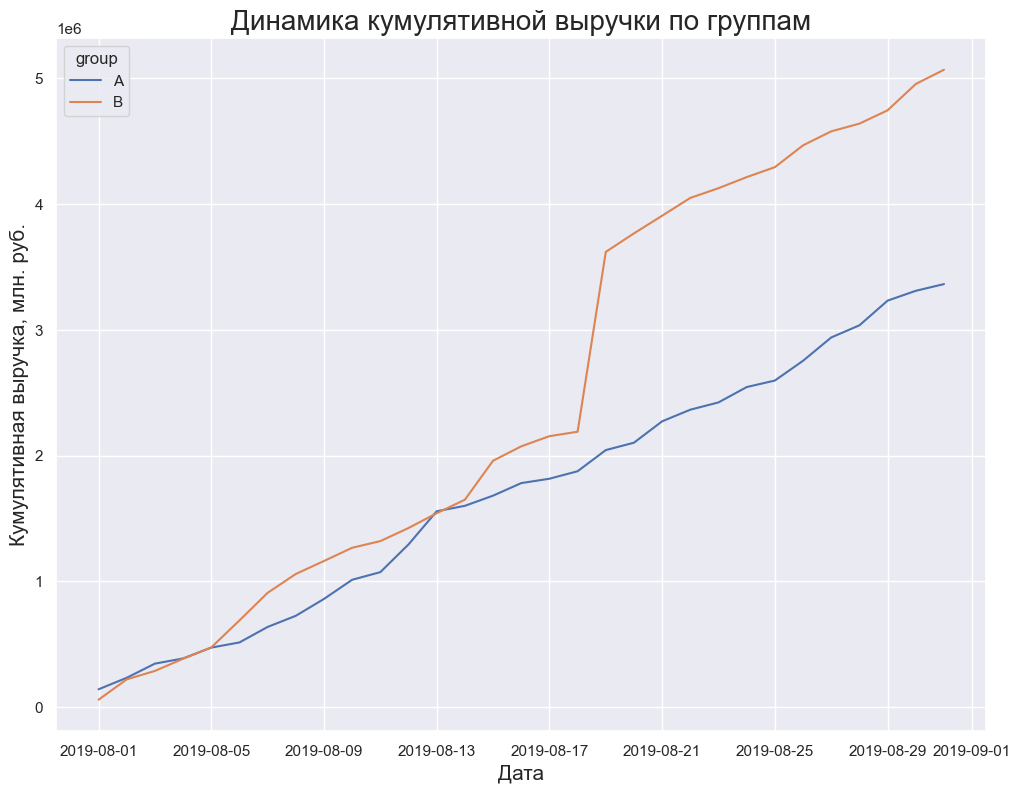

In [34]:
ax = sns.lineplot(data=cumulativeData, x='date', y='revenue', hue='group')
ax.set_title('Динамика кумулятивной выручки по группам', fontsize=20)
ax.set_ylabel('Кумулятивная выручка, млн. руб.', fontsize=15)
ax.set_xlabel('Дата', fontsize=15)

1. <b>График кумулятивной выручки на протяжении исследуемого месяца:</b>
- На протяжении всего анализируемого периода группа B превосходит группу А, только в одной точке сближаясь. 
- При этом в последней трети месяца в какой-то момент происходит резкий скачок, видимо аномально дорогой заказ или большое число заказов.

In [35]:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

Text(0.5, 0, 'Дата')

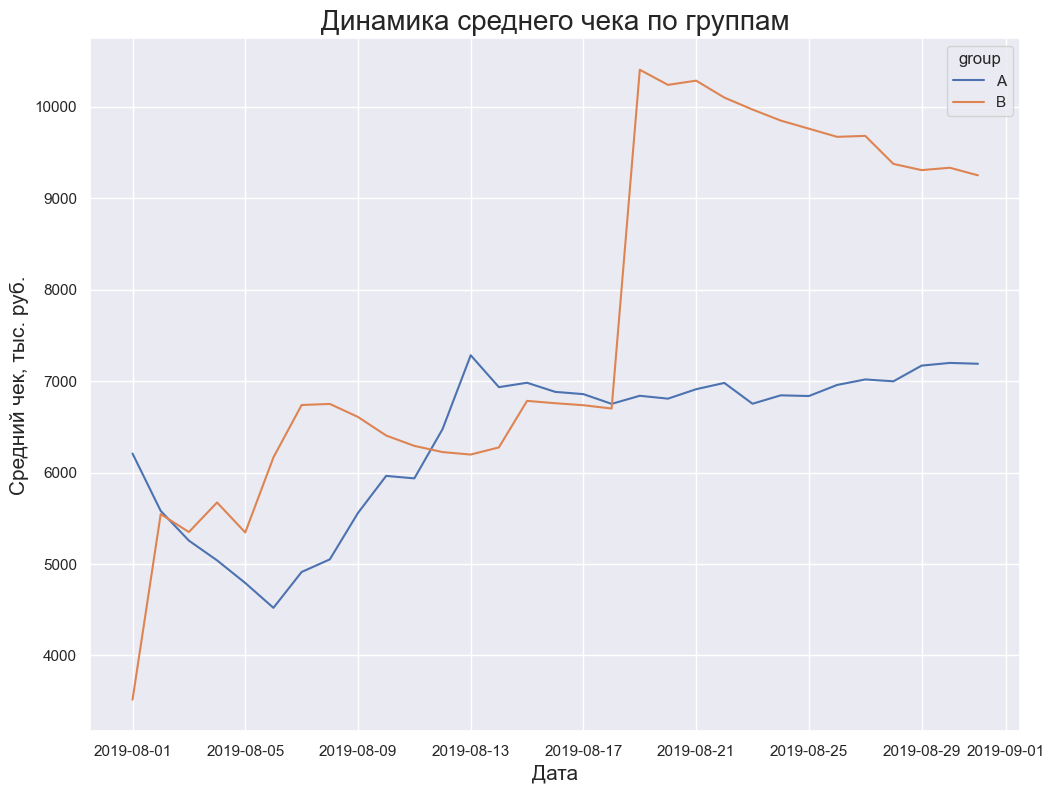

In [36]:
ax = sns.lineplot(data=cumulativeData, x='date', y=cumulativeData['revenue']/cumulativeData['orders'], hue='group')
ax.set_title('Динамика среднего чека по группам', fontsize=20)
ax.set_ylabel('Средний чек, тыс. руб.', fontsize=15)
ax.set_xlabel('Дата', fontsize=15)

2. <b>График кумулятивного среднего чека на протяжении исследуемого месяца:</b>
- В среднем чеке у группы В не было постоянного превосходства на протяжении всего анализируемого периода вплоть до последней трети месяца, когда происходит аномальный скачок.
- То есть мы понимаем, что этот резкий рост был вызван не большим количеством заказов, а именно высокой стоимостью одного или нескольких заказов.

In [37]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

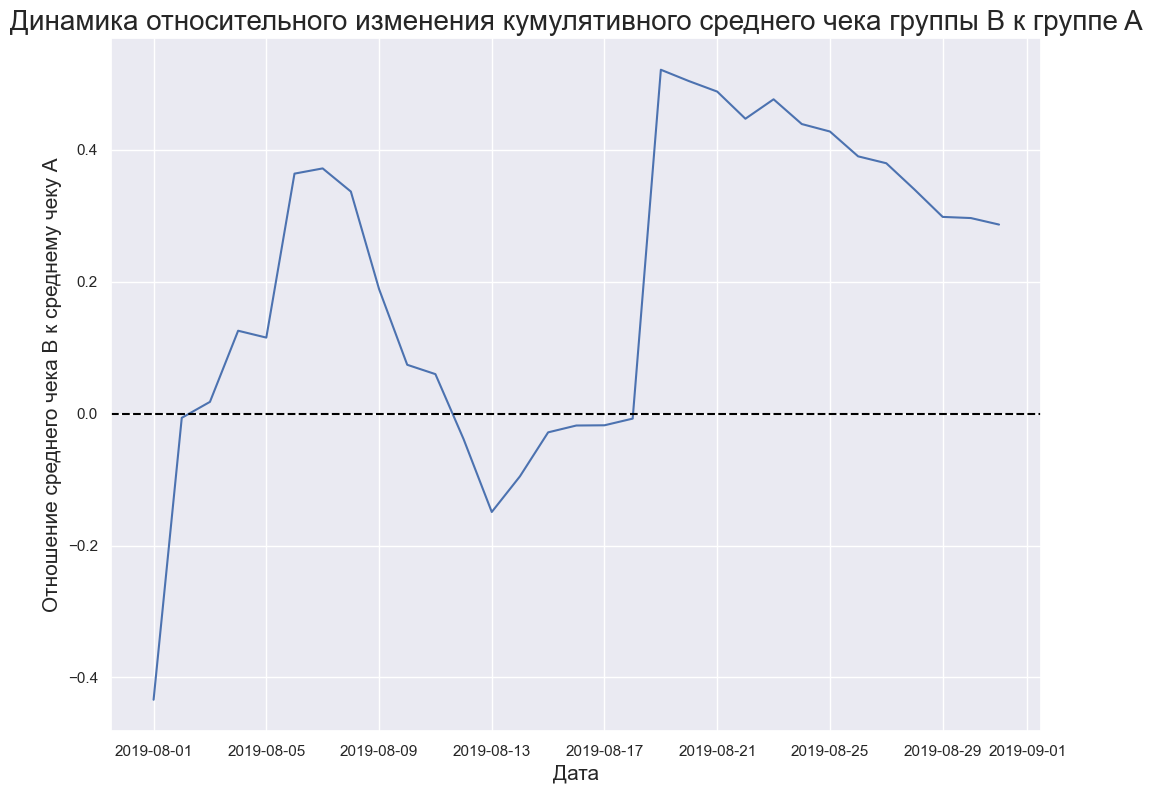

In [38]:
ax = sns.lineplot(data=mergedCumulativeRevenue, x='date', y=(mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
ax.set_title('Динамика относительного изменения кумулятивного среднего чека группы B к группе A', fontsize=20)
ax.set_ylabel('Отношение среднего чека В к среднему чеку А', fontsize=15)
ax.set_xlabel('Дата', fontsize=15)

plt.axhline(y=0, color='black', linestyle='--')

3. <b>График относительного изменения кумулятивного среднего чека группы В к группе А на протяжении исследуемого месяца:</b>
- Большую часть месяца средний чек в группе В большем, чем в группе А - это достаточно устойчивый тренд.

In [39]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

In [40]:
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

Text(0.5, 0, 'Дата')

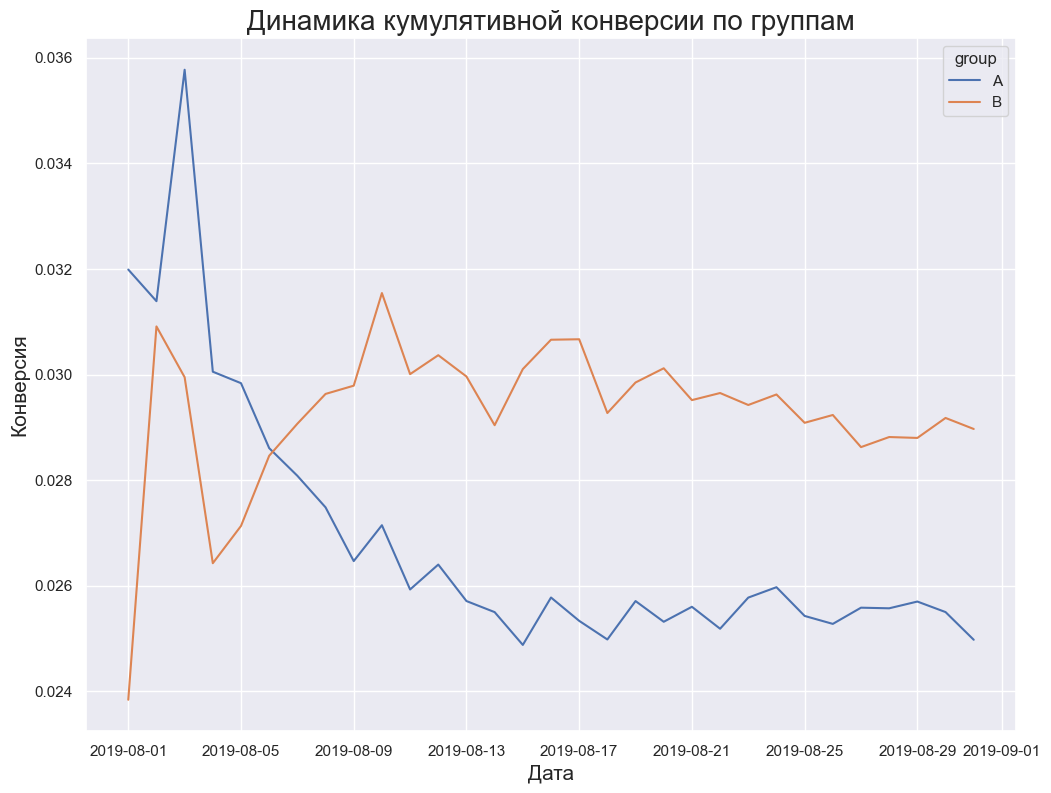

In [41]:
ax = sns.lineplot(data=cumulativeData, x='date', y='conversion', hue='group')
ax.set_title('Динамика кумулятивной конверсии по группам', fontsize=20)
ax.set_ylabel('Конверсия', fontsize=15)
ax.set_xlabel('Дата', fontsize=15)

4. <b>График кумулятивной конверсии на протяжении исследуемого месяца:</b>
- После некоторых колебаний в начале исследуемого периода графики обеих групп стабилизируются и мы видим, что группа В стабильно превосходит группу А на 3-4%.

In [42]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

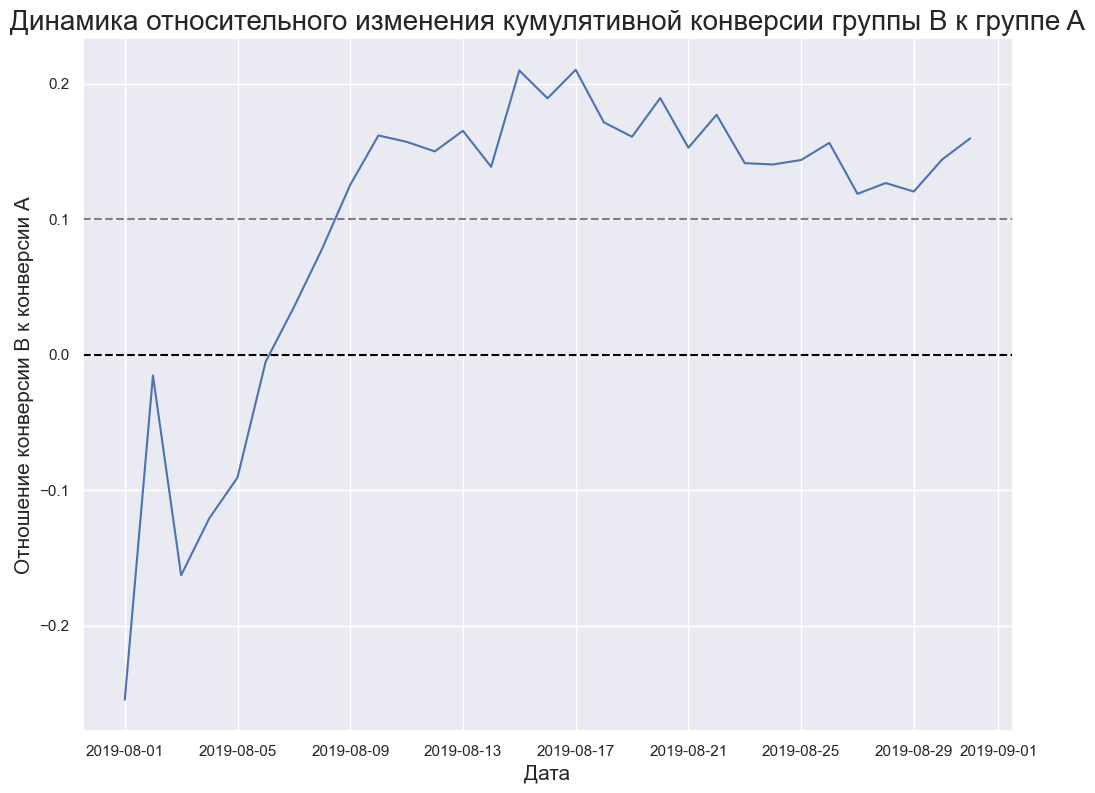

In [43]:
ax = sns.lineplot(data=mergedCumulativeConversions, x='date', y=mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)
ax.set_title('Динамика относительного изменения кумулятивной конверсии группы B к группе A', fontsize=20)
ax.set_ylabel('Отношение конверсии В к конверсии А', fontsize=15)
ax.set_xlabel('Дата', fontsize=15)

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.1, color='grey', linestyle='--')

5. <b>График относительного изменения кумулятивной конверсии группы В к группе А на протяжении исследуемого месяца:</b>
- Данный график подтверждает наш предыдущий вывод о стабильном превосходстве группы В - стабильно на 10% выше относительно группы А.

<a id="second_conclusion"></a>

### Промежуточный вывод

По результатам визуального анализа кумулятивных показателей можно отметить, что группа В стабильно превосходит группу А по всем исследуемым параметрам: кумулятивной выручке, среднему чеку и конверсии. В то же время, если по конверсия превосходство группы В неоспоримо, то относительно выручки и среднего чека мы можем заметить наличие аномалии, которая могла повлиять на результаты группы В. 

[Вернуться к оглавлению](#title)

<a id="third_step"></a>

## Поиск выбросов

Далее для выявления и ликвидации потенциальной аномалии необходимо сформировать список пользователей, демонстрировавших слишком высокие показатели количества заказов и их стоимости.

In [44]:
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)

ordersByUsers.columns = ['userId', 'orders']

print(ordersByUsers.sort_values(by='orders', ascending=False).head(10)) 

         userId  orders
908  3967698036  3     
55   249864742   3     
478  2108163459  3     
687  2988190573  3     
890  3908431265  3     
138  611059232   3     
632  2742574263  3     
157  678354126   2     
323  1404560065  2     
452  1985475298  2     


Как мы видим 7 клиентов точно выбиваются из общего списка, однако, для точности необходимо также посмотреть точечный график для этой переменной.

Text(0.5, 0, 'Пользователь')

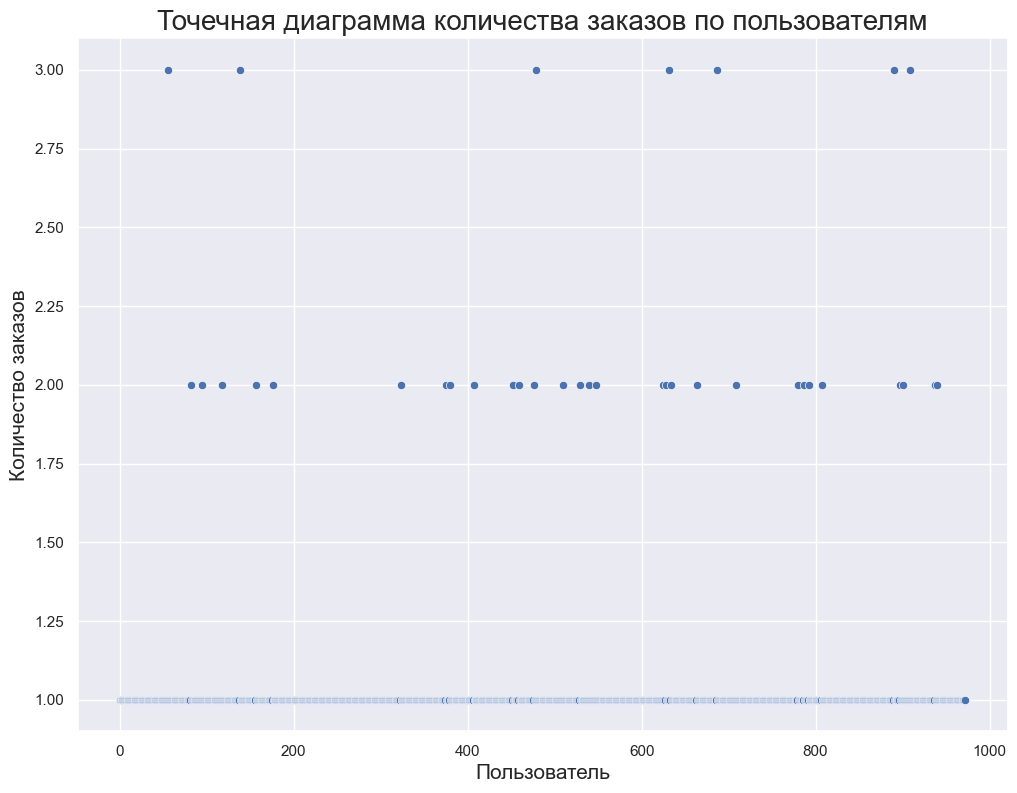

In [45]:
x_values = pd.Series(range(0,len(ordersByUsers['orders'])))

ax = sns.scatterplot(data=ordersByUsers, x=x_values, y='orders')
ax.set_title('Точечная диаграмма количества заказов по пользователям', fontsize=20)
ax.set_ylabel('Количество заказов', fontsize=15)
ax.set_xlabel('Пользователь', fontsize=15)

6. <b>Точечный график количества заказов на пользователя:</b>
- На графике мы видим, что подавляющее большинство пользователей сделали за этот месяц только один заказ, однако, и 2 заказа тоже не являются чем-то ненормальным.
- Для более точных данных нам необходимо изучить процентили данной переменной. 

In [46]:
orders_percent = {'Percentile':['95%', '99%'], 'Values':np.percentile(ordersByUsers['orders'], [95, 99])}
orders_percent = pd.DataFrame(data=orders_percent)
print ('95% и 99% процентили количества заказов на 1 пользователя за месяц:')
display(orders_percent)

95% и 99% процентили количества заказов на 1 пользователя за месяц:


,Percentile,Values
0,95%,1.0
1,99%,2.0


7. <b>95% и 99% процентили для количества заказов на пользователя в исследуемом месяце:</b>
- Оказалось, что 2 - это все таки 99% процентиль, хотя на графике создает ощущение, что таких заказов достаточно много. 
- В качестве границы для удаления аномальных пользователей мы возьмем 99% процентиль, так как эксперимент шел целый месяц, мы имеем достаточно большой объем данных и можем себе позволить большую точность. 

Text(0.5, 0, 'Заказ')

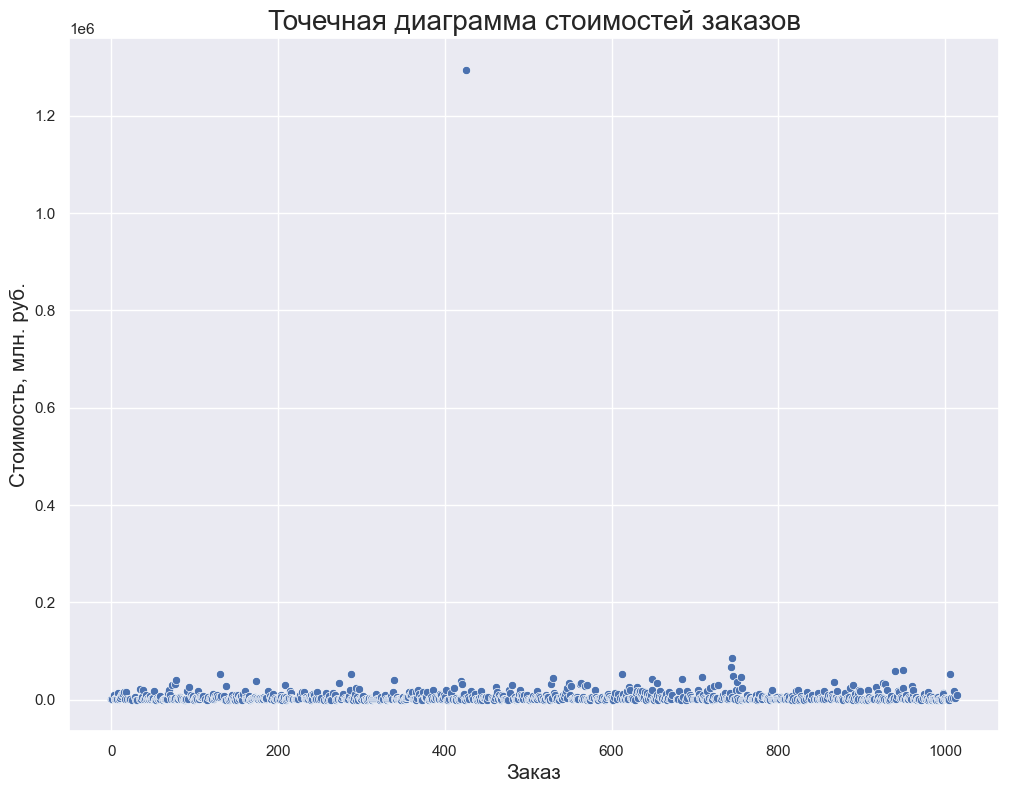

In [47]:
x_values = pd.Series(range(0,len(orders['revenue'])))

ax = sns.scatterplot(data=orders, x=x_values, y='revenue')
ax.set_title('Точечная диаграмма стоимостей заказов', fontsize=20)
ax.set_ylabel('Стоимость, млн. руб.', fontsize=15)
ax.set_xlabel('Заказ', fontsize=15)

Однако, как мы видим в данных присутствует аномальный заказ стоимостью более миллиона рублей, при том что средний чек, как мы видели на графиках выше, пребывает где-то в районе нескольких тысяч рублей, поэтому данный точечный график мало что показывает, необходимости построить его на данных без выброса.

Text(0.5, 0, 'Заказ')

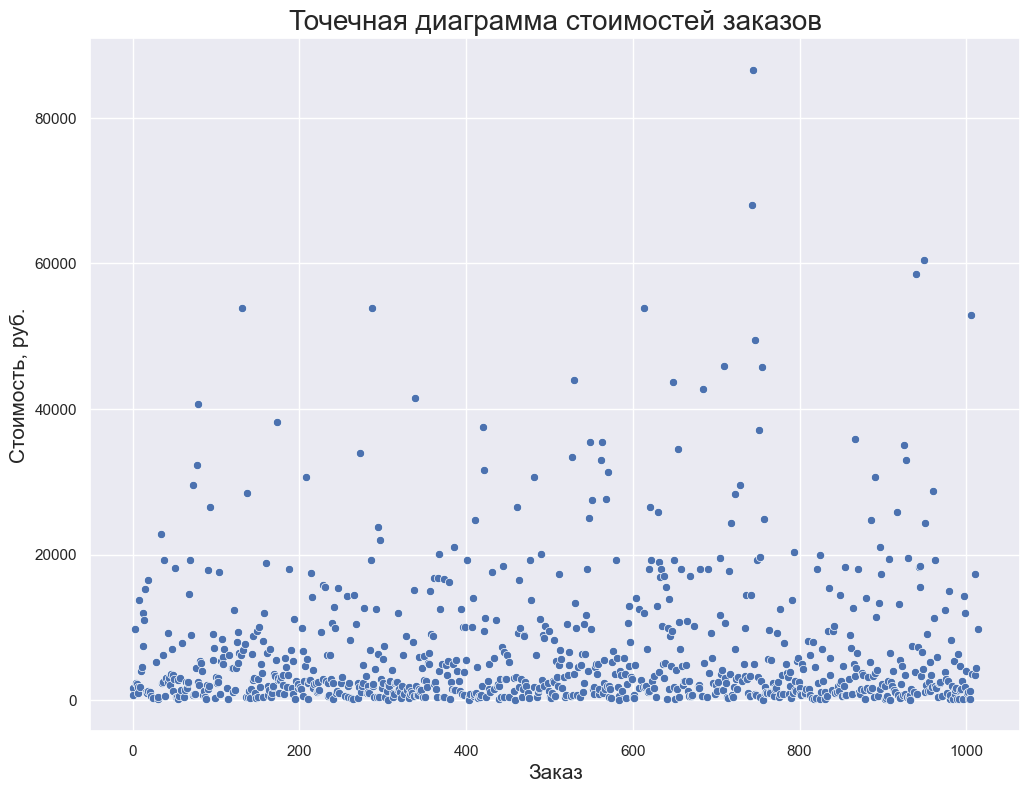

In [48]:
x_values = pd.Series(range(0,len(orders['revenue'])))

ax = sns.scatterplot(data=orders[orders['revenue']<200000], x=x_values, y='revenue')
ax.set_title('Точечная диаграмма стоимостей заказов', fontsize=20)
ax.set_ylabel('Стоимость, руб.', fontsize=15)
ax.set_xlabel('Заказ', fontsize=15)

8. <b>Точечный график стоимости заказов:</b>
- На графике мы видим, что есть один очень сильно выбивающийся заказ (видимо именно он так сильно исказил нам данные по группе В), а также еще один поменьше.
- На скорректированном графике заметно, что на самом деле остальные заказы стоят не дороже 100 тыс. руб., а большинство вообще дешевле 20 тыс. руб..
- Для более точных данных нам необходимо изучить процентили данной переменной. 

In [49]:
orders_percent = {'Percentile':['95%', '99%'], 'Values':np.percentile(orders['revenue'], [95, 99])}
orders_percent = pd.DataFrame(data=orders_percent)
print ('95% и 99% процентили стоимости заказов:')
display(orders_percent)

95% и 99% процентили стоимости заказов:


,Percentile,Values
0,95%,26785.0
1,99%,53904.0


7. <b>95% и 99% процентили для стоимости заказов:</b>
- В качестве границы для удаления аномальных пользователей мы здесь также возьмем 99% процентиль. 

[Вернуться к оглавлению](#title)

<a id="regions"></a>

### Промежуточный вывод

В предыдущем разделе мы предположили наличие аномально дорогих заказов в нашем массиве данных и они действительно нашлись. Пользователей, которые их сделали, необходимо будет удалить из выборки для чистоты результатов исследования.

[Вернуться к оглавлению](#title)

<a id="test"></a>

## A/B-тестирование

<a id="final_step"></a>

In [50]:
visitors.columns

Index(['date', 'group', 'visitors'], dtype='object')

In [51]:
orders.columns

Index(['transactionId', 'visitorId', 'date', 'revenue', 'group'], dtype='object')

Группируем данные и готовим их к анализу

In [52]:
#Создаем таблицу с данными только по группе А и переименовываем столбцы
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

#На ее основе формируем отдельную таблицу с кумулятивными данными и также переменовываем столбцы
visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

#Проводим аналогичные манипуляции с группой В
visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

In [53]:
#Делаем все то же самое с данными по заказам - собираем дневные данные по группам, преобразуем их в кумулятивные и переименовываем столбцы 
ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]


#Объединяем в единую таблицу данные по заказам и посетителям для каждой группы кумулятивные и ежедневные
data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

В результате получаем датафрейм, в котором содержатся подневные и кумулятивные данные по выручке, числе заказов и пользователей по каждой из групп.

In [54]:
display(data)

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,23,142779,17,59758,23,142779,17,59758,719,713,719,713
1,2019-08-02,19,91602,23,162043,42,234381,40,221801,619,581,1338,1294
2,2019-08-03,24,112473,14,67049,66,346854,54,288850,507,509,1845,1803
3,2019-08-04,11,41176,14,96890,77,388030,68,385740,717,770,2562,2573
4,2019-08-05,22,86383,21,89908,99,474413,89,475648,756,707,3318,3280
5,2019-08-06,15,40919,23,214842,114,515332,112,690490,667,655,3985,3935
6,2019-08-07,16,123248,23,219164,130,638580,135,909654,644,709,4629,4644
7,2019-08-08,14,88639,22,150141,144,727219,157,1059795,610,654,5239,5298
8,2019-08-09,11,134237,19,103166,155,861456,176,1162961,617,610,5856,5908
9,2019-08-10,15,152275,22,105162,170,1013731,198,1268123,406,369,6262,6277


In [55]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

Теперь, когда данные готовы, необходимо посчитать разницу в конверсии и среднем чеке между группами, для начала по сырым данным.

In [56]:
#Создаем выборки для тестирования гипотез
sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

Итак по конверсии: <br>
H0 - отсутствие разницы между средними значеними конверсии групп А и В <br>
H1 - наличие разницы между средними значеними конверсии групп А и В

Для их проверки мы будем использовать критерий Манна-Уиттни для выявления статистический различий в параметре между двумя выборками. За уровень статистической значимости мы возьмем <b>0.05</b>, как наиболее часто встречающийся и не создающий такой высокой вероятности ошибки 2 рода, как 0.01.

In [57]:
alpha = 0.05

print('p-value по результатам теста: ', "{0:.3f}".format(st.mannwhitneyu(sampleA, sampleB)[1]))

if st.mannwhitneyu(sampleA, sampleB)[1] > alpha:
    print ('Нет оснований отвергнуть нулевую гипотезу')
else:
    print ('Отвергаем нулевую гипотезу о равных средних')


print('Разница между средними значением конверсии групп А и В составила: ', "{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

p-value по результатам теста:  0.011
Отвергаем нулевую гипотезу о равных средних
Разница между средними значением конверсии групп А и В составила:  0.160


10. <b>Тест на статистическую значимость разницы в конверсии:</b>
- При проверке по сырым данным и принятии уровня значимости в 0.05 нулевая гипотеза о равенстве средних показателей конверсии отклоеняется.
- При этом сама средняя относительная разница достаточно велика - 16%.

Проверяем на сырых же данных гипотезы по среднему чеку.<br>
H0 - отсутствие разницы между средним чеком групп А и В <br>
H1 - наличие разницы между средним чеком групп А и В

Использоваться так же будет критерий Манна-Уиттни с уровнем статистической значимости в 0.05.

In [58]:
alpha = 0.05

print('p-value по результатам теста: ','{0:.3f}'.format(st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))

if st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1] > alpha:
    print ('Нет оснований отвергнуть нулевую гипотезу')
else:
    print ('Отвергаем нулевую гипотезу о равных средних')


print('Разница между средними чеками групп А и В составила: ', '{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

p-value по результатам теста:  0.829
Нет оснований отвергнуть нулевую гипотезу
Разница между средними чеками групп А и В составила:  0.287


11. <b>Тест на статистическую значимость разницы в средних чеках:</b>
- Изначально разница между чеками выглядела весьма внушительно на графика, рассчеты также показали, что группа В на четверть опережает по этому показателю группу А.
- Однако, при проверке по сырым данным и принятии уровня значимости в 0.05 нулевая гипотеза о равенстве средних чеков не может быть отклонена.
- После удаления выбросов мы скорее всего получим еще более убедительный результат в пользу отсутствия разницы.

In [59]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['userId'],
    ],
    axis=0,
)

usersWithExpensiveOrders = orders[orders['revenue'] > 53904.0]['visitorId']
usersWithExpensiveOrders.name = 'userId'
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

In [60]:
print(abnormalUsers.head(5))
print(abnormalUsers.shape[0]) 

1099    148427295
33      249864742
58      611059232
949     887908475
744     888512513
Name: userId, dtype: int64
16


Итак, для очищения данных мы удалим 16 пользователей с аномальными показателями.

In [61]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

Создаем фильтрованный дата-фрейм для расчета конверсии.

Проводится тот же тест с тем же уровнем значимости.

In [62]:
alpha = 0.05

print('p-value по результатам теста: ', "{0:.7f}".format(st.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))

if st.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1] > alpha:
    print ('Нет оснований отвергнуть нулевую гипотезу')
else:
    print ('Отвергаем нулевую гипотезу о равных средних')


print('Разница между средними значением конверсии групп А и В составила: ', "{0:.3f}".format(sampleBFiltered.mean() / sampleAFiltered.mean() - 1))

p-value по результатам теста:  0.0070213
Отвергаем нулевую гипотезу о равных средних
Разница между средними значением конверсии групп А и В составила:  0.189


12. <b>Тест на статистическую значимость разницы в конверсии по очищенным данным:</b>
- При проверке по очищенным данным и принятии уровня значимости в 0.05 нулевая гипотеза о равенстве средних показателей конверсии все так же отклоняется.
- Разница в конверсии группы В относительно группы А при этом оказалась достаточно существенной - почти 19%, изменившись в большую сторону относительно теста по сырым данным.

Проводится тот же тест с тем же уровнем значимости.

In [63]:
alpha = 0.05
#Проводим тест, извлекаем p-value
print('p-value по результатам теста: ', 
    '{0:.3f}'.format(
        st.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)
#Выводим результаты теста в понятном виде
if st.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1] > alpha:
    print ('Нет оснований отвергнуть нулевую гипотезу')
else:
    print ('Отвергаем нулевую гипотезу о равных средних')
#Для большей ясности еще выводим разницу средних значений
print('Разница между средними чеками групп А и В составила: ', 
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

p-value по результатам теста:  0.788
Нет оснований отвергнуть нулевую гипотезу
Разница между средними чеками групп А и В составила:  -0.032


13. <b>Тест на статистическую значимость разницы в средних чеках по очищенным данным:</b>
- Как уже упоминалось, изначально разница между чеками выглядела весьма внушительно на графика, рассчеты на сырых данных также показали, что группа В на четверть опережает по этому показателю группу А.
- Однако, мы изначально также предполагали, что это разница вызвана аномально дорогими заказами в группе В, которые и были удалены.
- При проверке по очищенным данным и принятии уровня значимости в 0.05 нулевая гипотеза о равенстве средних показателей конверсии не может быть отклонена.
- Более того, рассчет разницы в среднихч чеках на очищенных данных показал, что средний чек в группе В даже очень ненамного, но ниже, чем в группе А.

## Итоговый вывод

- По результатам приоритезации гипотез методами ICE и RICE в топе оказались гипотезы о создании подписки для получения базы e-mail клиентов, а также о добавлении 2 новых каналов привлечения пользователей.
- По результатам A/B-тестирования, изначально казалось, что группа B убедительно обходит группу А по всем исследуемым параметрам: конверсии, числу заказов и среднему чеку.
- Однако, после удаления аномальных данных, выяснилось, что реально группа В превосходит группу А только в конверсии, статистически значимой разницы в средних чеках при этом нет.

14. <b>Решение по результатам теста:</b>
- Остановить тест, зафиксировав победу группы В.
- Так как тест шел месяц и графики кумулятивных показателей продемонстрировали свою стабилизацию, продолжать тест бесмыссленно.
- Статистические тесты показали отсутствие статистически значимой разницы в среднем чеке.
- При этом превосходство группы В в конверсии вполне ощутимо и составляет 19% относительно аналогичного показателя группы А.

[Вернуться к оглавлению](#title)